<a href="https://colab.research.google.com/github/lucaspinheiro27/Deep_Learning_AI/blob/main/Aula_05_KNN_com_pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

def normalizar(x): #x será uma lista de valores numéricos
  return (x - np.min(x))/(np.max(x) - np.min(x))

def padronizar(x):
  return (x -np.mean(x))/np.std(x)


df = pd.read_csv("train.csv")

In [4]:
df = df.drop(columns=['id', 'nome', 'bilhete'])
df

,sobreviveu,classe_social,sexo,idade,parentes,dependentes,tarifa,cabine,embarque
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sobreviveu     891 non-null    int64  
 1   classe_social  891 non-null    int64  
 2   sexo           891 non-null    object 
 3   idade          714 non-null    float64
 4   parentes       891 non-null    int64  
 5   dependentes    891 non-null    int64  
 6   tarifa         891 non-null    float64
 7   cabine         204 non-null    object 
 8   embarque       889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
df.isna().sum()

,0
sobreviveu,0
classe_social,0
sexo,0
idade,177
parentes,0
dependentes,0
tarifa,0
cabine,687
embarque,2


In [7]:
df = df.drop('cabine', axis=1)
#df.drop('cabine', inplace=True)
#df = df.drop(columns=['cabine'])
#df = df[['sobreviveu',	'classe_social',	'sexo',	'idade','parentes',	'dependentes',	'tarifa',	'embarque']]
df.head(50)

,sobreviveu,classe_social,sexo,idade,parentes,dependentes,tarifa,embarque
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [8]:
df = df.dropna()
df

,sobreviveu,classe_social,sexo,idade,parentes,dependentes,tarifa,embarque
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df = pd.get_dummies(df, columns=['classe_social', 'sexo',  'embarque'])
df

,sobreviveu,idade,parentes,dependentes,tarifa,classe_social_1,classe_social_2,classe_social_3,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,False,False,True,True,False,False,True,False
886,0,27.0,0,0,13.0000,False,True,False,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,True,False,False,False,True
889,1,26.0,0,0,30.0000,True,False,False,False,True,True,False,False


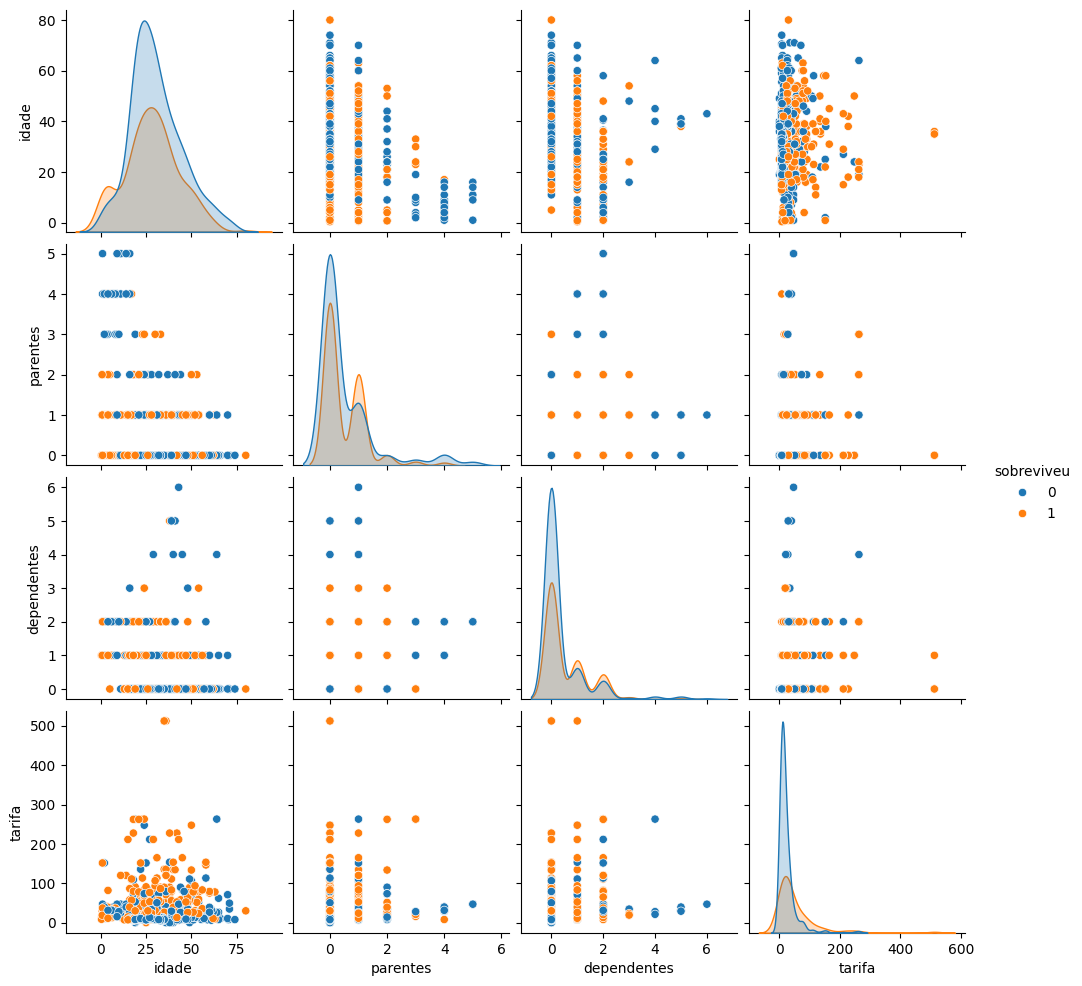

In [10]:
import seaborn as sb
sb.pairplot(df[['idade',	'parentes',	'dependentes'	,'tarifa', 'sobreviveu']], hue='sobreviveu')

In [11]:

from scipy.stats import shapiro
# Verificar normalidade usando o teste de Shapiro-Wilk
def verifica_normalidade(dataframe, coluna):
    coluna_data = dataframe[coluna]
    # Realizar o teste de Shapiro-Wilk
    statistic, p_valor = shapiro(coluna_data)
    # Definir o nível de significância
    nivel_significancia = 0.1
    # Verificar se a hipótese nula de normalidade pode ser rejeitada
    if p_valor > nivel_significancia:
        print(f"A coluna '{coluna}' segue uma distribuição normal")
        return True
    else:
        print(f"A coluna '{coluna}' não segue uma distribuição normal")
        return False

In [12]:
# Chamando a função para verificar normalidade
for coluna in ['idade',	'parentes',	'dependentes',	'tarifa'	]:
  if verifica_normalidade(df, coluna):
    df[coluna] = padronizar(df[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    df[coluna] = normalizar(df[coluna])

A coluna 'idade' não segue uma distribuição normal
A coluna 'parentes' não segue uma distribuição normal
A coluna 'dependentes' não segue uma distribuição normal
A coluna 'tarifa' não segue uma distribuição normal


In [13]:
#for coluna in ['idade',	'parentes',	'dependentes',	'tarifa'	]:
#  df[coluna] = normalizar(df[coluna])

df

,sobreviveu,idade,parentes,dependentes,tarifa,classe_social_1,classe_social_2,classe_social_3,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,0,0.271174,0.2,0.000000,0.014151,False,False,True,False,True,False,False,True
1,1,0.472229,0.2,0.000000,0.139136,True,False,False,True,False,True,False,False
2,1,0.321438,0.0,0.000000,0.015469,False,False,True,True,False,False,False,True
3,1,0.434531,0.2,0.000000,0.103644,True,False,False,True,False,False,False,True
4,0,0.434531,0.0,0.000000,0.015713,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,0.484795,0.0,0.833333,0.056848,False,False,True,True,False,False,True,False
886,0,0.334004,0.0,0.000000,0.025374,False,True,False,False,True,False,False,True
887,1,0.233476,0.0,0.000000,0.058556,True,False,False,True,False,False,False,True
889,1,0.321438,0.0,0.000000,0.058556,True,False,False,False,True,True,False,False


In [14]:
def distancia_euclidiana(A, B):
  if len(A) != len(B):
    print("ERRO de dimensões.")
    return 0

  total = 0
  for i in range(0, len(A)):
    total += (B[i] - A[i])**2

  return total**0.5


In [15]:
pontoA = [6, 3, 200, 1795, -50]
pontoB = [12, -7, 2, 355, -9]

distancia_euclidiana(pontoA, pontoB)

1454.1736485028189

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y = df['sobreviveu']
X = df.drop('sobreviveu', axis=1)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
knn = KNeighborsClassifier(n_neighbors=27)

# Treinar o modelo kNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [18]:
y_pred = knn.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo kNN:", accuracy)

Acurácia do modelo kNN: 0.8041958041958042


In [19]:
print("n=",len(y))
print("k=", (len(y))**0.5)

n= 712
k= 26.68332812825267


In [20]:
#testando o k ideal
for k in range(3, 51, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  # Treinar o modelo kNN
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # Avaliar a acurácia do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia para k={k}:", accuracy)

Acurácia para k=3: 0.7552447552447552
Acurácia para k=5: 0.7342657342657343
Acurácia para k=7: 0.7762237762237763
Acurácia para k=9: 0.7692307692307693
Acurácia para k=11: 0.7762237762237763
Acurácia para k=13: 0.7762237762237763
Acurácia para k=15: 0.7692307692307693
Acurácia para k=17: 0.7832167832167832
Acurácia para k=19: 0.7762237762237763
Acurácia para k=21: 0.7902097902097902
Acurácia para k=23: 0.7832167832167832
Acurácia para k=25: 0.8041958041958042
Acurácia para k=27: 0.8041958041958042
Acurácia para k=29: 0.7832167832167832
Acurácia para k=31: 0.7902097902097902
Acurácia para k=33: 0.7832167832167832
Acurácia para k=35: 0.7832167832167832
Acurácia para k=37: 0.7692307692307693
Acurácia para k=39: 0.7762237762237763
Acurácia para k=41: 0.7622377622377622
Acurácia para k=43: 0.7692307692307693
Acurácia para k=45: 0.7692307692307693
Acurácia para k=47: 0.7762237762237763
Acurácia para k=49: 0.7832167832167832


In [21]:
# Selecionar o primeiro exemplo do conjunto de teste
exemplo = X_test.iloc[[0]]
saida_real = y_test.iloc[0]

# Fazer a previsão com o modelo treinado
previsao = knn.predict(exemplo)

# Imprimir a previsão e a saída real
print("Previsão:", previsao[0])
print("Saída Real:", saida_real)


Previsão: 1
Saída Real: 1


In [22]:
# Fazer previsões para todo o conjunto de teste
previsoes = knn.predict(X_test)

# Criar um DataFrame para comparar as previsões com as saídas reais
comparacao = pd.DataFrame({'Previsão': previsoes, 'Saída Real': y_test})

# Mostrar o DataFrame de comparação
comparacao


,Previsão,Saída Real
641,1,1
496,1,1
262,0,0
311,1,1
551,0,0
...,...,...
362,1,0
56,1,1
137,0,0
651,1,1
